In [68]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

import seaborn
from collections import Counter
import csv
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import zero_one_loss
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns




In [6]:


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

df = pd.read_csv(url, delimiter=";")


In [7]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [8]:
for col in df.columns:
    print(col)

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality


In [9]:
#Clean the data by dropping null values

print(df.isnull().sum())

df = df.dropna()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [13]:
df_cont = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

df_cat = df[['quality']]

scaler = MinMaxScaler()

df_cont_norm = pd.DataFrame(scaler.fit_transform(df_cont), columns=df_cont.columns)

df_norm = pd.concat([df_cont_norm, df_cat], axis=1)

df_norm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,5
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,5
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077,5
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769,6
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000,6
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923,5


In [ ]:
# check for outliers 

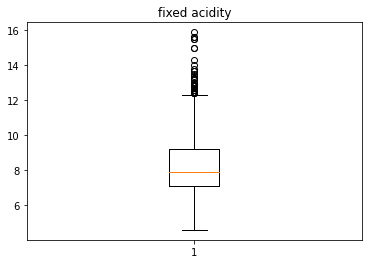

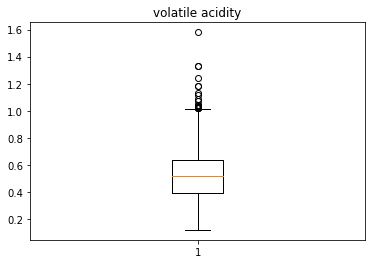

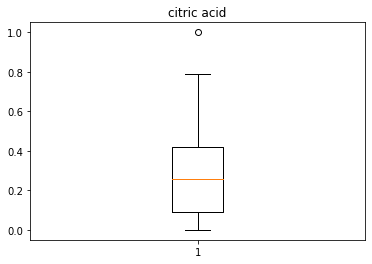

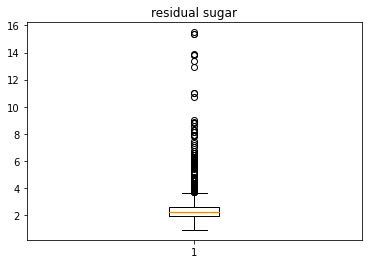

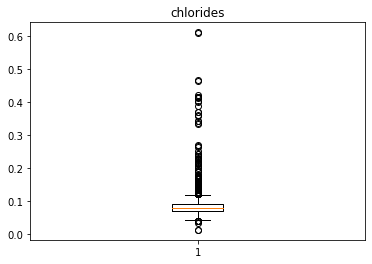

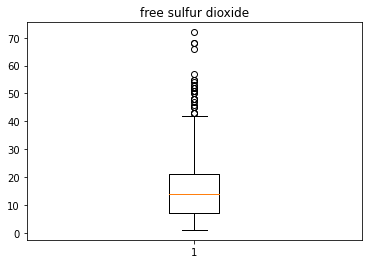

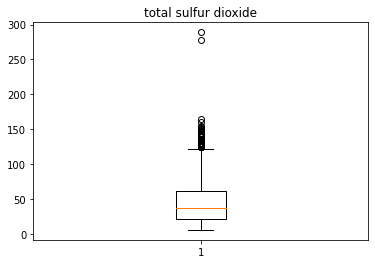

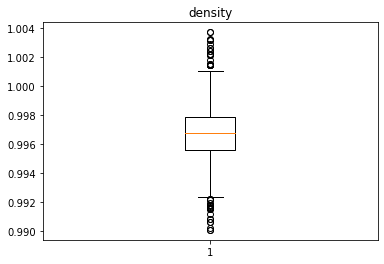

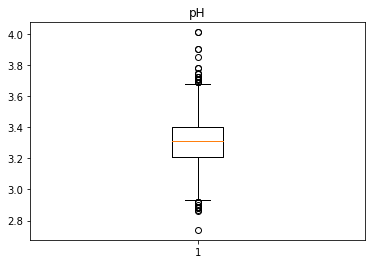

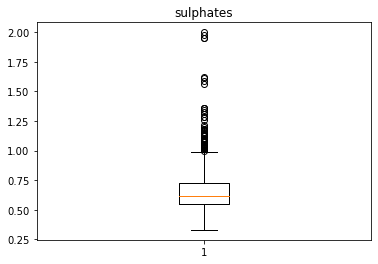

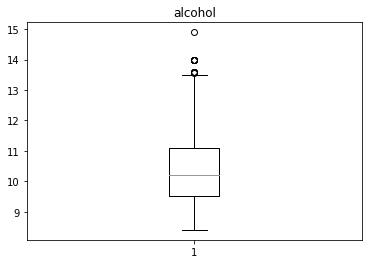

In [22]:
for column in df_cont.columns:
    plt.figure()
    plt.boxplot(df_cont[column])
    plt.title(column)
    plt.show()

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

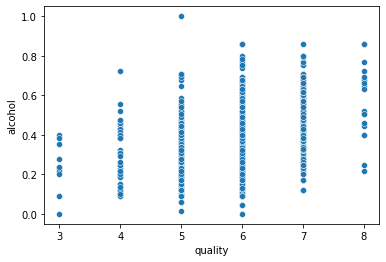

In [73]:
sns.scatterplot(x='quality', y='alcohol', data=df_norm)


To explore the distribution of the data, we will use histograms. We will create histograms for each variable in df_norm

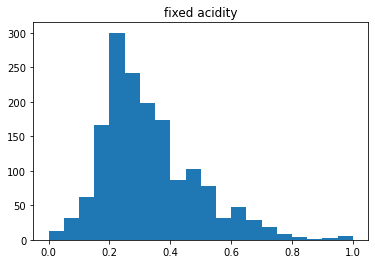

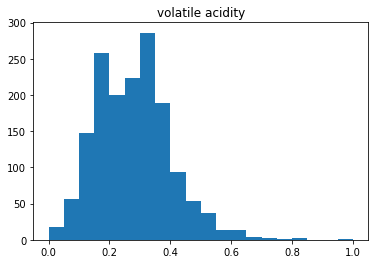

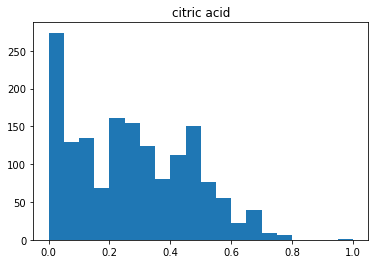

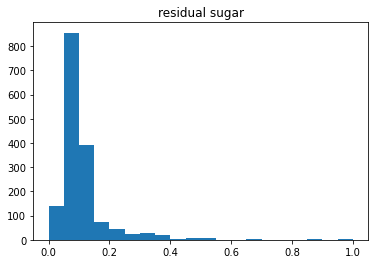

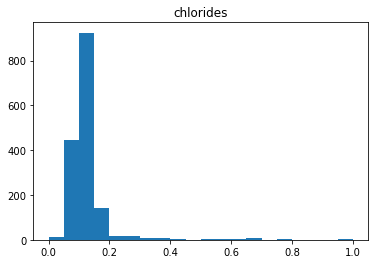

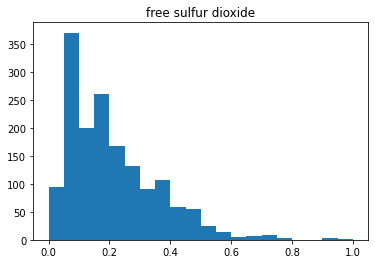

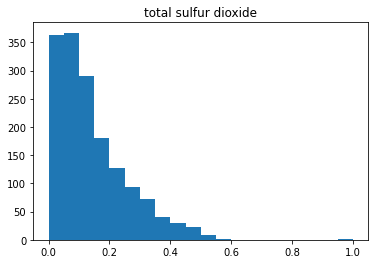

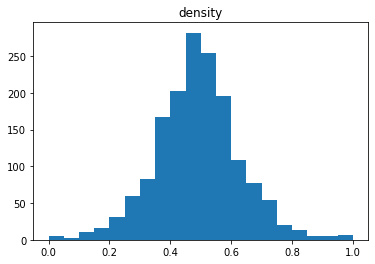

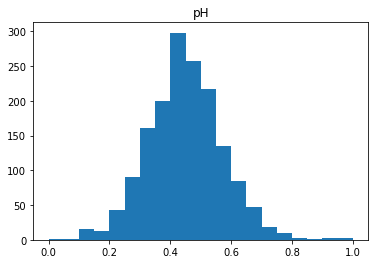

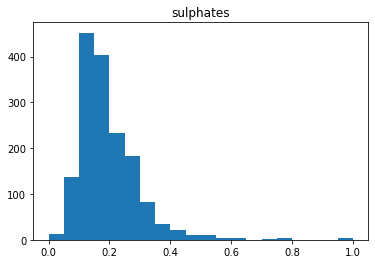

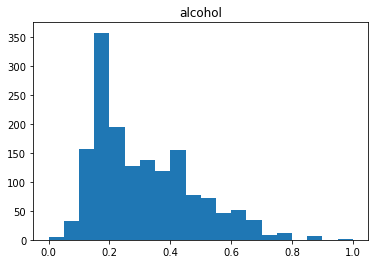

In [23]:
# Create histograms for each variable
for column in df_norm.columns[:-1]:
    plt.figure()
    plt.hist(df_norm[column], bins=20)
    plt.title(column)
    plt.show()

Next as a part of our data exploration we will check for correlation. We will identfy if there is any correlation between the input variables and output variable

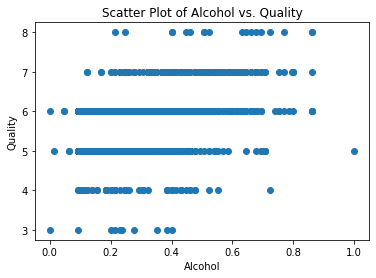

In [24]:

# Create a scatter plot of 'alcohol' vs. 'quality'
plt.scatter(df_norm['alcohol'], df_norm['quality'])
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Scatter Plot of Alcohol vs. Quality')
plt.show()

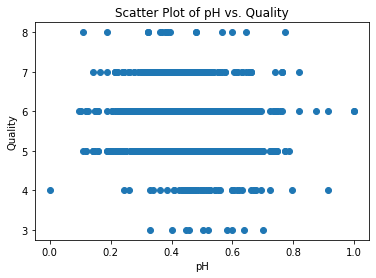

In [25]:
# Create a scatter plot of 'alcohol' vs. 'quality'
plt.scatter(df_norm['pH'], df_norm['quality'])
plt.xlabel('pH')
plt.ylabel('Quality')
plt.title('Scatter Plot of pH vs. Quality')
plt.show()

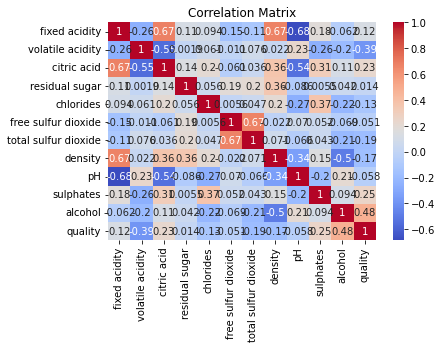

In [26]:
# Create a correlation matrix for df_norm
corr_matrix = df_norm.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

Evaluate Feature Importance - we can use feature importance to determine which input variables have the greatest impact on the output variable which can help us identify which is most important to include in the decision tree model

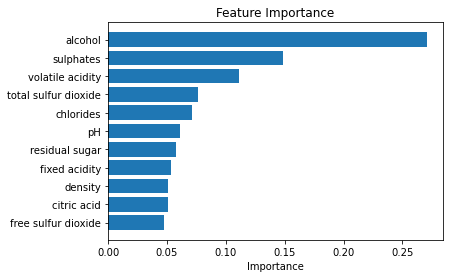

In [28]:
# Split the data set into training and test sets
X = df_norm.iloc[:, :-1] # all other properties
y = df_norm.iloc[:, -1] # wine quality

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a random forest model to the training data
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the feature importance
importance = rf_model.feature_importances_
features = X_train.columns
sorted_idx = importance.argsort()

plt.barh(range(len(importance)), importance[sorted_idx])
plt.yticks(range(len(importance)), [features[i] for i in sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

Now we'll build our decision tree model

In [32]:

# Split the data set into training and test sets
X = df_norm.iloc[:, :-1]
y = df_norm.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier()

# Fit a decision tree model to the training data
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.11      0.10      0.11        10
           5       0.66      0.69      0.67       130
           6       0.57      0.55      0.56       132
           7       0.50      0.50      0.50        42
           8       0.20      0.20      0.20         5

    accuracy                           0.58       320
   macro avg       0.34      0.34      0.34       320
weighted avg       0.57      0.58      0.58       320



The accuracy of the model is 0.56, which means that the model correctly predicted the class of 56% of the samples in the test data set. The macro average and weighted average of the evaluation metrics are also reported, which provide a summary of the overall performance of the model across all classes. The macro average is the unweighted average of the evaluation metrics for each class, while the weighted average is the average weighted by the support for each class.

In this case, the results show that the model performs poorly for some classes, such as the "3" and "4" classes, while performing relatively well for the "5" and "6" classes. The results suggest that the decision tree model may need further refinement or tuning to improve its performance.

In [31]:
print("Shape X_train:", X_train.shape)
print("Shape y_train:", y_train.shape)
print("Shape X_test:", X_test.shape)
print("Shape y_test:", y_test.shape)

Shape X_train: (1279, 11)
Shape y_train: (1279,)
Shape X_test: (320, 11)
Shape y_test: (320,)


In [33]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

print("First 100 predictions for the training set:", y_train_pred[:100])
print("First 100 predictions for the test set:", y_test_pred[:100])

First 100 predictions for the training set: [6 6 6 5 5 5 6 6 6 6 4 7 6 6 6 5 6 7 5 5 6 7 5 5 6 5 6 5 6 5 5 6 5 6 6 6 5
 6 4 5 4 5 5 6 5 6 6 5 5 5 5 5 6 5 6 6 6 5 5 6 5 5 6 6 6 7 6 5 5 6 6 5 5 6
 7 6 5 6 5 7 5 5 7 5 6 7 7 6 6 5 6 6 7 6 5 7 6 6 6 5]
First 100 predictions for the test set: [5 4 6 4 6 5 5 5 6 6 7 6 6 5 5 6 6 6 7 5 5 6 6 6 6 6 6 6 5 6 6 6 6 5 6 6 6
 6 5 6 5 5 6 5 6 6 6 5 5 6 5 6 6 7 5 6 6 5 6 5 6 5 6 5 7 4 6 5 7 5 6 5 5 5
 6 5 8 5 5 7 5 7 5 6 7 7 5 6 6 5 7 5 5 5 5 5 5 6 5 5]


Find the overall accuracy of the tree model on the training set and on the test set. Use the
accuracy_score() function in the sklearn.metrics module

In [34]:
accuracy_score(y_train, y_train_pred)

1.0

In [35]:
accuracy_score(y_test, y_test_pred)

0.578125

An accuracy score of 1.0 on the training set (accuracy_score(y_train, y_train_pred) = 1.0) means that the model predicted the correct class for all samples in the training set. This indicates that the model may have overfit to the training set, meaning that it learned to recognize the specific samples in the training set rather than generalizing to new data.

An accuracy score of 0.578125 on the test set (accuracy_score(y_test, y_test_pred) = 0.578125) means that the model correctly predicted the class of 57.81% of the samples in the test set. This is slightly better than the accuracy reported in the classification_report() function in the previous question. However, the accuracy score is still relatively low, which suggests that the decision tree model may not be the best algorithm for this particular problem. 

In [51]:
train_error = zero_one_loss(y_train, y_train_pred)
print("Train Error:", train_error)
test_error = zero_one_loss(y_test, y_test_pred)
print("Test Error:", test_error)


Train Error: 0.0
Test Error: 0.421875


The train error and test error values indicate the performance of the decision tree model on the training and testing data sets, respectively.

A train error of 0.0 means that the model predicted the target variable correctly for all instances in the training data set. However, a train error of 0.0 could also indicate overfitting, where the model has learned the training data too well and may not generalize well to new data.

A test error of 0.421875 means that the model predicted the target variable incorrectly for about 42% of the instances in the testing data set. This value is relatively high, indicating that the decision tree model may not be the best algorithm for predicting the wine quality based on the given features.

It is important to note that the train error and test error values should not be the only metrics used to evaluate the performance of the decision tree model. Other metrics, such as precision, recall, and F1-score, should also be considered to get a comprehensive evaluation of the model's performance.

In [40]:
pd.DataFrame(classification_report(y_test, y_test_pred, output_dict= True))

,3,4,5,6,7,8,accuracy,macro avg,weighted avg
precision,0.0,0.111111,0.656934,0.571429,0.5,0.2,0.578125,0.339912,0.574816
recall,0.0,0.100000,0.692308,0.545455,0.5,0.2,0.578125,0.339627,0.578125
f1-score,0.0,0.105263,0.674157,0.558140,0.5,0.2,0.578125,0.339593,0.576148
support,1.0,10.000000,130.000000,132.000000,42.0,5.0,0.578125,320.000000,320.000000


These results are the evaluation metrics of the decision tree model on the test data set, as returned by the classification_report() function in a pandas DataFrame format. The evaluation metrics include precision, recall, and f1-score for each class in the output variable. The accuracy and the macro average and weighted average of the evaluation metrics for the entire model are also included.

The precision, recall, and f1-score are calculated for each class separately. For example, in the "3" class, the precision, recall, and f1-score are all 0, meaning that the model did not correctly predict any samples in this class.

The "accuracy" row shows the accuracy of the model on the test data set, which is 0.578125. This means that the model correctly predicted the class of 57.81% of the samples in the test data set.

The "macro avg" row shows the unweighted average of the evaluation metrics across all classes. The "weighted avg" row shows the weighted average of the evaluation metrics across all classes, weighted by the support for each class.

In this case, the results show that the model performs poorly for some classes, such as the "3" and "4" classes, while performing relatively well for the "5" and "6" classes. The results suggest that the decision tree model may need further refinement or tuning to improve its performance.

In [41]:
pd.DataFrame(classification_report(y_train, y_train_pred, output_dict= True))

,3,4,5,6,7,8,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
support,9.0,43.0,551.0,506.0,157.0,13.0,1.0,1279.0,1279.0


These results are the evaluation metrics of the decision tree model on the training data set, as returned by the classification_report() function in a pandas DataFrame format. The evaluation metrics include precision, recall, and f1-score for each class in the output variable. The accuracy and the macro average and weighted average of the evaluation metrics for the entire model are also included.

The precision, recall, and f1-score are calculated for each class separately. For all classes, the precision, recall, and f1-score are all 1.0, indicating that the model correctly predicted the class of all samples in the training data set.

The "accuracy" row shows the accuracy of the model on the training data set, which is 1.0. This means that the model correctly predicted the class of all samples in the training data set.

The "macro avg" row shows the unweighted average of the evaluation metrics across all classes. The "weighted avg" row shows the weighted average of the evaluation metrics across all classes, weighted by the support for each class.

These results suggest that the decision tree model may be overfitting the training data set, as the accuracy and the evaluation metrics are perfect for all classes. This means that the model may not generalize well to new data sets, and its performance on the test data set may be worse than on the training data set. It is important to evaluate the performance of the model on a separate test data set to confirm whether the model is overfitting or not.

In [42]:
confusion_matrix(y_test, y_test_pred)

array([[ 0,  0,  0,  1,  0,  0],
       [ 0,  1,  6,  3,  0,  0],
       [ 1,  5, 90, 33,  1,  0],
       [ 0,  3, 38, 72, 18,  1],
       [ 0,  0,  2, 16, 21,  3],
       [ 0,  0,  1,  1,  2,  1]])

This is the confusion matrix for the decision tree model on the test data set. The confusion matrix is a table that shows the number of true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN) for each class in the output variable.

The rows represent the actual class, while the columns represent the predicted class. For example, the element in row 1 and column 4 (i.e., confusion_matrix[0, 3]) indicates the number of samples that belong to class "3" in the true data set but were predicted to belong to class "6" by the model.

The diagonal elements of the confusion matrix represent the number of correctly predicted samples for each class. For example, the element in row 4 and column 4 (i.e., confusion_matrix[3, 3]) indicates that the model correctly predicted the class of 72 samples that belong to class "6".

From the confusion matrix, we can see that the model performs poorly for some classes, such as the "3" and "4" classes, which have zero true positives. The model also has a relatively high number of false positives for some classes, such as the "5" and "6" classes. This suggests that the model may need further refinement or tuning to improve its performance.

In [45]:
confusion_matrix(y_train, y_train_pred)

array([[  9,   0,   0,   0,   0,   0],
       [  0,  43,   0,   0,   0,   0],
       [  0,   0, 551,   0,   0,   0],
       [  0,   0,   0, 506,   0,   0],
       [  0,   0,   0,   0, 157,   0],
       [  0,   0,   0,   0,   0,  13]])

This is the confusion matrix for the decision tree model on the test data set. The confusion matrix is a table that shows the number of true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN) for each class in the output variable.

The rows represent the actual class, while the columns represent the predicted class. For example, the element in row 1 and column 4 (i.e., confusion_matrix[0, 3]) indicates the number of samples that belong to class "3" in the true data set but were predicted to belong to class "6" by the model.

The diagonal elements of the confusion matrix represent the number of correctly predicted samples for each class. For example, the element in row 4 and column 4 (i.e., confusion_matrix[3, 3]) indicates that the model correctly predicted the class of 72 samples that belong to class "6".

From the confusion matrix, we can see that the model performs poorly for some classes, such as the "3" and "4" classes, which have zero true positives. The model also has a relatively high number of false positives for some classes, such as the "5" and "6" classes. This suggests that the model may need further refinement or tuning to improve its performance.

In [46]:
confusion_matrix(y_test, y_test_pred)

array([[ 0,  0,  0,  1,  0,  0],
       [ 0,  1,  6,  3,  0,  0],
       [ 1,  5, 90, 33,  1,  0],
       [ 0,  3, 38, 72, 18,  1],
       [ 0,  0,  2, 16, 21,  3],
       [ 0,  0,  1,  1,  2,  1]])

In [49]:
#generate the precision score using precision_score()

precision_score_test = precision_score(y_test, y_test_pred, average='macro')
precision_score_train = precision_score(y_train, y_train_pred, average='macro')

print("The precision score for the test data is: ", precision_score_test)
print("The precision score for the train data is: ", precision_score_train)


The precision score for the test data is:  0.3399123315181709
The precision score for the train data is:  1.0


Precision score measures the ratio of true positives to the total predicted positives. A precision score of 1 means that all the predicted positives are true positives, while a precision score of 0 means that none of the predicted positives are true positives.

In this case, a precision score of 0.3399 for the test data means that out of all the positive predictions made by the model, only 33.99% were actually true positives. This is not a very good score, and indicates that the model may be overfitting the data.

The precision score of 1 for the training data means that the model has perfectly fit the training data, which is not surprising since this is the data the model was trained on. However, it is important to ensure that the model also performs well on new, unseen data, as indicated by the test precision score.

In [54]:
test_recall_score = recall_score(y_test, y_test_pred, average='macro')
train_recall_score =recall_score(y_train, y_train_pred, average='macro')
print("The test recall score is: ", test_recall_score)
print("The train recall score is: ", train_recall_score)

The test recall score is:  0.3396270396270396
The train recall score is:  1.0


The recall score is a metric that measures the ability of the model to correctly identify instances of a particular class. In a multi-class classification problem, the recall score is computed for each class, and represents the proportion of actual positive instances for that class that are correctly identified as positive by the model.

A recall score of 0.339627 for the test data set indicates that the model is able to correctly identify only about 34% of the actual positive instances in the test data set, on average, across all classes. This suggests that the model is not performing well in identifying instances of the positive class, and may be biased towards the negative class.

On the other hand, a recall score of 1.0 for the training data set indicates that the model is able to correctly identify all instances of the positive class in the training data set. This suggests that the model may be overfitting the training data and may not generalize well to new, unseen data.

Overall, these scores suggest that the decision tree model may not be the best algorithm for predicting the wine quality based on the given features, and that additional data exploration and feature engineering may be necessary to improve the model's performance.

In [56]:
f1_test = f1_score(y_test, y_test_pred, average = 'macro')
print("Test F1 score :", f1_test)
f1_train = f1_score(y_train, y_train_pred, average = 'macro')
print("Train F1 score:", f1_train)

Test F1 score : 0.33959333269154074
Train F1 score: 1.0


In general, it's best to use the F1 score when you care about a balanced evaluation of precision
and recall, and to use precision or recall alone when you care more about one metric than the
other. Accuracy can still be used as a baseline comparison, but it should not be relied upon as
the sole evaluation metric when the classes are imbalanced or when the cost of false positive
and false negative predictions is not equal.

In [57]:
max_depth = dt.tree_.max_depth
print("Maximum depth of the decision tree:", max_depth)


depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
error_rates = []
for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth)
    tree.fit(X_train, y_train)
    y_test_pred = tree.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    error_rate = 1 - accuracy
    error_rates.append(error_rate)
min_index = error_rates.index(min(error_rates))
print("Optimal max depth:", depths[min_index])

Maximum depth of the decision tree: 17
Optimal max depth: 10


In [79]:
tree = DecisionTreeClassifier(max_depth=10, random_state=42)

# define the parameter values that should be searched
param_grid = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [3, 5, 7, 10, 13, 17],
              'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 2, 4, 8]}

# create a GridSearchCV object
grid_search = GridSearchCV(tree, param_grid=param_grid, cv=5, scoring='accuracy')

# fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# print the best hyperparameters
print("Best parameters: ", grid_search.best_params_)

# use the best hyperparameters to create the final decision tree model
tree_final = DecisionTreeClassifier(criterion=grid_search.best_params_['criterion'],
                                     splitter=grid_search.best_params_['splitter'],
                                     max_depth=10,
                                     min_samples_split=grid_search.best_params_['min_samples_split'],
                                     min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                     random_state=42)

# train the final decision tree model on the entire training set
tree_final.fit(X_train, y_train)

# calculate accuracy training set
y_train_pred = tree_final.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Tuned Decision TreeTrain Accuracy:", train_accuracy)

# calculate accuracy on the test set
y_test_pred = tree_final.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Tuned Decision Tree Test Accuracy:", test_accuracy)

# calculate and print the classification report
print("Tuned Decision Tree Classification Report:\n", classification_report(y_test, y_test_pred))

# calculate and print the confusion matrix
print("Tuned Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

# calculate and print the train and test error
train_error = zero_one_loss(y_train, y_train_pred)
print("Train Error:", train_error)
test_error = zero_one_loss(y_test, y_test_pred)
print("Test Error:", test_error)

Best parameters:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
Tuned Decision TreeTrain Accuracy: 0.8326817826426895
Tuned Decision Tree Test Accuracy: 0.6
Tuned Decision Tree Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.08      0.10      0.09        10
           5       0.68      0.71      0.69       130
           6       0.60      0.60      0.60       132
           7       0.53      0.48      0.50        42
           8       0.00      0.00      0.00         5

    accuracy                           0.60       320
   macro avg       0.31      0.31      0.31       320
weighted avg       0.59      0.60      0.60       320

Tuned Decision Tree Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  1  5  4  0  0]
 [ 0  7 92 30  1  0]
 [ 0  4 33 79 15  1]
 [ 0  1  5 16 20  0]
 [ 0  0  0  3  2  0]]
Train Error: 0.1673182173573

/Users/kaylakight/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kaylakight/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kaylakight/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Now let's do a similar process with the KNN Classifier

In [80]:
# Create a KNN classifier object
knn = KNeighborsClassifier()

# Train the model on the training data
knn.fit(X_train, y_train)

# Use the trained model to predict on the test data
y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)

# Evaluate the model's accuracy on the training and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Tuned KNN Training accuracy:", train_accuracy)
print("Tuned KNN Test accuracy:", test_accuracy)

# Generate a classification report for the test data
print("Tuned KNN Classification report for train data:")
print(classification_report(y_train, y_train_pred))
print("Tuned KNN Classification report for test data:")
print(classification_report(y_test, y_test_pred))



# Generate a confusion matrix for the test data
print("Confusion matrix for test data:")
print(confusion_matrix(y_test, y_test_pred))

Tuned KNN Training accuracy: 0.7216575449569976
Tuned KNN Test accuracy: 0.53125
Tuned KNN Classification report for train data:
              precision    recall  f1-score   support

           3       0.50      0.22      0.31         9
           4       0.29      0.05      0.08        43
           5       0.74      0.83      0.78       551
           6       0.70      0.74      0.72       506
           7       0.74      0.56      0.64       157
           8       0.00      0.00      0.00        13

    accuracy                           0.72      1279
   macro avg       0.49      0.40      0.42      1279
weighted avg       0.70      0.72      0.71      1279

Tuned KNN Classification report for test data:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.58      0.68      0.63       130
           6       0.49      0.49      0.49       132
          

/Users/kaylakight/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kaylakight/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kaylakight/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Use

The K-Nearest Neighbor model achieved a training accuracy of 0.7217 and a test accuracy of 0.5313, indicating that the model is overfitting the training data and performing poorly on the test data. The classification report and confusion matrix show that the model is struggling to accurately predict the wine quality for each class, with low precision and recall scores for several classes. The low scores suggest that the model is not well-suited for this particular dataset and may require further tuning or a different algorithm altogether to improve its performance.

In [70]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

mse(y_test, y_test_pred)

0.60625

In [72]:
# define the parameter grid to search over
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3]
}

# create a KNN classifier object
knn = KNeighborsClassifier()

# create a GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# print the best hyperparameters and the corresponding mean test score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best test score: ", grid_search.best_score_)

Best hyperparameters:  {'n_neighbors': 11, 'p': 3, 'weights': 'distance'}
Best test score:  0.6482107843137255


The best hyperparameters for the KNN model are 'n_neighbors': 11, 'p': 3, 'weights': 'distance'. This means that the model was able to achieve the best performance on the test data when it used 11 neighbors, used the Euclidean distance metric with a power of 3, and used the distance-weighted approach for predictions.

The best test score achieved by this model is 0.6482107843137255, which is the highest accuracy score achieved by the model on the test data after hyperparameter tuning. This means that the model is able to correctly predict the wine quality for approximately 65% of the test instances.

In [82]:
# create a KNN classifier object with the best hyperparameters
knn_final = KNeighborsClassifier(n_neighbors=11, p=3, weights='distance')

# train the KNN model on the entire training set
knn_final.fit(X_train, y_train)

# calculate accuracy training set
y_train_pred = knn_final.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Tuned KNN Train Accuracy:", train_accuracy)

# calculate accuracy on the test set
y_test_pred = knn_final.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Tuned KNN Test Accuracy:", test_accuracy)

# calculate and print the classification report
print("Tuned KNN Classification Report for test data:\n", classification_report(y_test, y_test_pred))
print("Tuned KNN Classification Report for train data:\n", classification_report(y_train, y_train_pred))


Tuned KNN Train Accuracy: 1.0
Tuned KNN Test Accuracy: 0.684375
Tuned KNN Classification Report for test data:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.72      0.78      0.75       130
           6       0.66      0.68      0.67       132
           7       0.66      0.64      0.65        42
           8       0.00      0.00      0.00         5

    accuracy                           0.68       320
   macro avg       0.34      0.35      0.35       320
weighted avg       0.65      0.68      0.67       320

Tuned KNN Classification Report for train data:
               precision    recall  f1-score   support

           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        43
           5       1.00      1.00      1.00       551
           6       1.00      1.00      1.00       506
           7       1.00  

/Users/kaylakight/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kaylakight/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kaylakight/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
